In [16]:
import os
import exifread
import pandas as pd
import fiona
from itertools import chain
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [17]:
# sets up dictionary for lat/long/photo name
output = dict()
output['name'] = []
output['lon'] = []
output['lat'] = []

#set photo directory + photo file type of interest
path = '/Users/elizabeth/Google Drive/NTRES_3260_Budbreak/Dana_photos/April1827/'
file_type = '.JPG'

for file in os.listdir(path):
    
    if file.endswith(file_type):
        
        full_path = path + file
        f = open(full_path, 'rb') #opens photo for processing
        tags = exifread.process_file(f) #grabs all exif tag data
        
        for tag in tags:
            
            # in exhaustive manner, turns GPS IdfTag into float decimal
            #.values gets values from IdfTag format
            #.num (or .den) gets float values from Ratio, the default type for all the values in the tag

            if tag in ('GPS GPSLongitude'):
                
                output['name'].append(file) #adds photo name to dictionary; does it here to ensure that photo has GPS data
                
                coord = tags[tag]
                
                if tags['GPS GPSLongitudeRef'].values == 'W':
                    degrees = - coord.values[0].num
                else:
                    degrees = coord.values[0].num
                minutes = coord.values[1].num/60. 
                seconds = coord.values[2].num/coord.values[2].den/3600
                
                decimal_lon = round(degrees + minutes + seconds, 4) 
                output['lon'].append(decimal_lon) #appends to dictionary

            if tag in ('GPS GPSLatitude'):

                coord = tags[tag]
                
                if tags['GPS GPSLatitudeRef'] == 'S':
                    degrees = - coord.values[0].num
                else:
                    degrees = coord.values[0].num
                minutes = coord.values[1].num/60. 
                seconds = coord.values[2].num/coord.values[2].den/3600
                
                decimal_lat = round(degrees + minutes + seconds, 4)
                output['lat'].append(decimal_lat) #appends to dictionary

print (output)

{'lat': [42.4485, 42.4483, 42.4474, 42.4477, 42.4473, 42.4475, 42.4484, 42.4479, 42.4484, 42.4498, 42.4498, 42.45, 42.45, 42.4503, 42.4512, 42.4532, 42.4532, 42.4492, 42.4494, 42.4498, 42.4488, 42.4482, 42.4476, 42.4474, 42.4484, 42.4479, 42.4464, 42.4452, 42.4452, 42.4447, 42.448, 42.4481, 42.4485], 'lon': [-75.5113, -75.5115, -75.5118, -75.515, -75.5153, -75.516, -75.5194, -75.5193, -75.5219, -75.522, -75.522, -75.5223, -75.5223, -75.522, -75.5203, -75.5195, -75.5187, -75.5127, -75.5118, -75.5101, -75.5115, -75.5115, -75.5112, -75.5119, -75.512, -75.5149, -75.5283, -75.5192, -75.5192, -75.5187, -75.5193, -75.5194, -75.5178], 'name': ['IMG_6678.JPG', 'IMG_6679.JPG', 'IMG_6680.JPG', 'IMG_6681.JPG', 'IMG_6682.JPG', 'IMG_6683.JPG', 'IMG_6684.JPG', 'IMG_6686.JPG', 'IMG_6687.JPG', 'IMG_6688.JPG', 'IMG_6689.JPG', 'IMG_6690 (1).JPG', 'IMG_6690.JPG', 'IMG_6691.JPG', 'IMG_6692.JPG', 'IMG_6695.JPG', 'IMG_6696.JPG', 'IMG_6697.JPG', 'IMG_6698.JPG', 'IMG_6714.JPG', 'IMG_6715.JPG', 'IMG_6716.JPG', 

In [18]:
df = pd.DataFrame(output)
df[['lon', 'lat']] = df[['lon', 'lat']].astype(float)
print (df)

        lat      lon              name
0   42.4485 -75.5113      IMG_6678.JPG
1   42.4483 -75.5115      IMG_6679.JPG
2   42.4474 -75.5118      IMG_6680.JPG
3   42.4477 -75.5150      IMG_6681.JPG
4   42.4473 -75.5153      IMG_6682.JPG
5   42.4475 -75.5160      IMG_6683.JPG
6   42.4484 -75.5194      IMG_6684.JPG
7   42.4479 -75.5193      IMG_6686.JPG
8   42.4484 -75.5219      IMG_6687.JPG
9   42.4498 -75.5220      IMG_6688.JPG
10  42.4498 -75.5220      IMG_6689.JPG
11  42.4500 -75.5223  IMG_6690 (1).JPG
12  42.4500 -75.5223      IMG_6690.JPG
13  42.4503 -75.5220      IMG_6691.JPG
14  42.4512 -75.5203      IMG_6692.JPG
15  42.4532 -75.5195      IMG_6695.JPG
16  42.4532 -75.5187      IMG_6696.JPG
17  42.4492 -75.5127      IMG_6697.JPG
18  42.4494 -75.5118      IMG_6698.JPG
19  42.4498 -75.5101      IMG_6714.JPG
20  42.4488 -75.5115      IMG_6715.JPG
21  42.4482 -75.5115      IMG_6716.JPG
22  42.4476 -75.5112      IMG_6717.JPG
23  42.4474 -75.5119      IMG_6718.JPG
24  42.4484 -75.5120     

In [19]:
shp = fiona.open('nys_gis/CEN2000nycty.036.shp.07865/cty036.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

42.4576 -76.5488


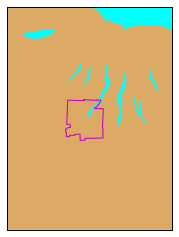

In [79]:
m = Basemap(
    projection='tmerc',
    lon_0=-76.5488,
    lat_0=42.4576,
    #ellps = 'WGS84',
    llcrnrlon=-76.5488+1,
    llcrnrlat=42.4576-1,
    urcrnrlon=-76.5488-1,
    urcrnrlat=42.4576+1,
    lat_ts=0,
    resolution='h',
    suppress_ticks=True)

m.fillcontinents(color='#ddaa66',lake_color='aqua')

m.readshapefile(
    'nys_gis/CEN2000nycty.036.shp.07865/cty036', 'nystate',
    drawbounds = False)

for info, shape in zip(m.nystate_info, m.nystate):
    if info['NAME'] == 'Tompkins':
        x, y = zip(*shape)
        m.plot(x, y, marker=None, color='m')

lat1 = output['lat']
lon1 = output['lon']
print (lat, lon)

lon = -76.5488
lat = 42.4576
x,y = m(lon, lat)

m.scatter(x,y,3,marker='o',color='k')

In [ ]:
from netCDF4 import Dataset, num2date
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os
# data downloaded from the form at
# http://coastwatch.pfeg.noaa.gov/erddap/tabledap/apdrcArgoAll.html
filename, headers = urllib.urlretrieve('http://coastwatch.pfeg.noaa.gov/erddap/tabledap/apdrcArgoAll.nc?longitude,latitude,time&longitude>=0&longitude<=360&latitude>=-90&latitude<=90&time>=2010-01-01&time<=2010-01-08&distinct()')
dset = Dataset(filename)
lats = dset.variables['latitude'][:]
lons = dset.variables['longitude'][:]
time = dset.variables['time']
times = time[:]
t1 = times.min(); t2 = times.max()
date1 = num2date(t1, units=time.units)
date2 = num2date(t2, units=time.units)
dset.close()
os.remove(filename)
# draw map with markers for float locations
m = Basemap(projection='hammer',lon_0=180)
x, y = m(lons,lats)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,3,marker='o',color='k')
plt.title('Locations of %s ARGO floats active between %s and %s' %\
        (len(lats),date1,date2),fontsize=12)
plt.show()